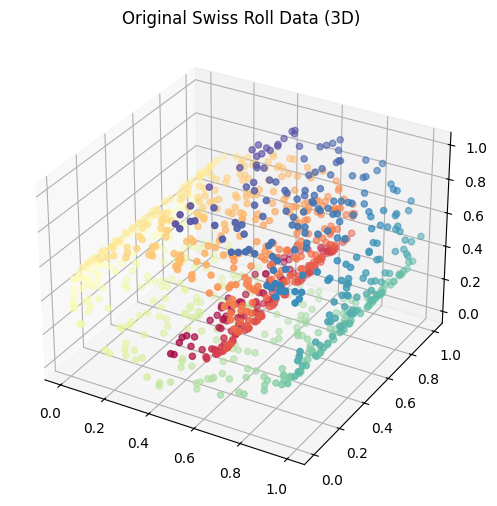

Epoch [10/100], Loss: 0.0326
Epoch [20/100], Loss: 0.0243
Epoch [30/100], Loss: 0.0253
Epoch [40/100], Loss: 0.0144
Epoch [50/100], Loss: 0.0314
Epoch [60/100], Loss: 0.0322
Epoch [70/100], Loss: 0.0254
Epoch [80/100], Loss: 0.0202
Epoch [90/100], Loss: 0.0443
Epoch [100/100], Loss: 0.0321


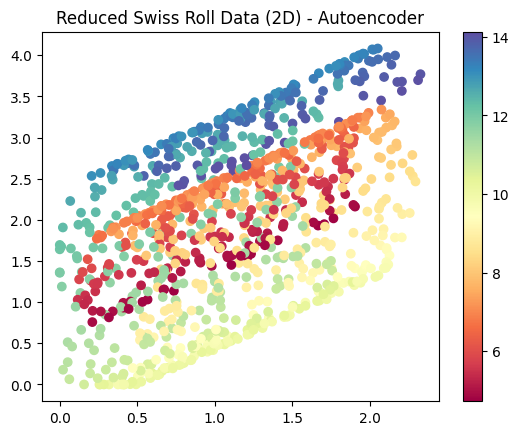

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
import numpy as np

# サンプルデータ生成 (スイスロール)
data, colors = make_swiss_roll(n_samples=1000)
data = (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))  # 正規化
data = torch.tensor(data, dtype=torch.float32)

# 次元削減前のデータ (3Dプロット)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors, cmap='Spectral')
ax.set_title("Original Swiss Roll Data (3D)")
plt.show()

# Autoencoderモデルの定義
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# モデルの初期化
input_dim = data.shape[1]
encoding_dim = 2  # 次元削減後の次元
model = Autoencoder(input_dim, encoding_dim)

# 損失関数と最適化
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 学習プロセス
epochs = 100
batch_size = 32
for epoch in range(epochs):
    permutation = torch.randperm(data.size(0))
    for i in range(0, data.size(0), batch_size):
        indices = permutation[i:i + batch_size]
        batch_data = data[indices]

        # 順伝播
        _, reconstructed = model(batch_data)
        loss = criterion(reconstructed, batch_data)

        # 逆伝播と更新
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# 次元削減結果の取得
with torch.no_grad():
    reduced_data, _ = model(data)

# 次元削減後のデータ (2Dプロット)
reduced_data = reduced_data.numpy()
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors, cmap='Spectral')
plt.title("Reduced Swiss Roll Data (2D) - Autoencoder")
plt.colorbar()
plt.show()
